In [7]:
%pip install ucimlrepo matplotlib seaborn pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
from ucimlrepo import fetch_ucirepo

In [9]:
# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

In [10]:
# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

In [11]:
# metadata
print(online_shoppers_purchasing_intention_dataset.metadata)

{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'ID': 367, 'type': 'NATIVE', 'title': 'Real-time prediction of online shoppers’ pur

In [12]:
# variable information
print(online_shoppers_purchasing_intention_dataset.variables)

                       name     role         type demographic description  \
0            Administrative  Feature      Integer        None        None   
1   Administrative_Duration  Feature      Integer        None        None   
2             Informational  Feature      Integer        None        None   
3    Informational_Duration  Feature      Integer        None        None   
4            ProductRelated  Feature      Integer        None        None   
5   ProductRelated_Duration  Feature   Continuous        None        None   
6               BounceRates  Feature   Continuous        None        None   
7                 ExitRates  Feature   Continuous        None        None   
8                PageValues  Feature      Integer        None        None   
9                SpecialDay  Feature      Integer        None        None   
10                    Month  Feature  Categorical        None        None   
11         OperatingSystems  Feature      Integer        None        None   

## Análisis de la composición del dataset

Determinar la cantidad de muestras y variables, verificar los valores faltantes y mostrar los tipos de datos.

In [13]:
# Cantidad de muestras y variables
print(f"Number of samples: {X.shape[0]}")
print(f"Number of variables: {X.shape[1]}")

Number of samples: 12330
Number of variables: 17


In [14]:
# Valores faltantes
print("Valores faltantes por columna:")
print(X.isnull().sum())

Valores faltantes por columna:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64


In [15]:
# Tipos de datos de las variables
print("Data types of variables:")
print(X.dtypes)

Data types of variables:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
dtype: object


Este análisis de la composición de la base de datos muestra que el conjunto de datos contiene 12,330 muestras y 17 variables predictoras, además de la valiable objetivo "Revenue". No se identificaron valores faltantes en ninguna de las variables, por lo que no es necesario aplicar estrategias de imputación.
Por los tipos de datos, las variables se clasifican en:
*   **Numéricas:** Estas variables ya están en un formato numérico adecuado para el análisis.
*   **Categóricas:** Estas variables requerirán codificación, buscar una estrategia adecuada.
*   **Binarias:** La variable "Weekend" ya es binaria (Booleana), y "Revenue" es la variable objetivo, también binaria.

## Análisis exploratorio de datos
Se realizan visualizaciones exploratorias con tres objetivos principales:
1. Analizar la distribución de las variables individuales
2. Examinar las relaciones entre variables predictoras y la variable objetivo "Revenue"
3. Identificar valores atípicos y patrones significativos

Este proceso permite comprender la estructura del dataset y la naturaleza de las variables.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

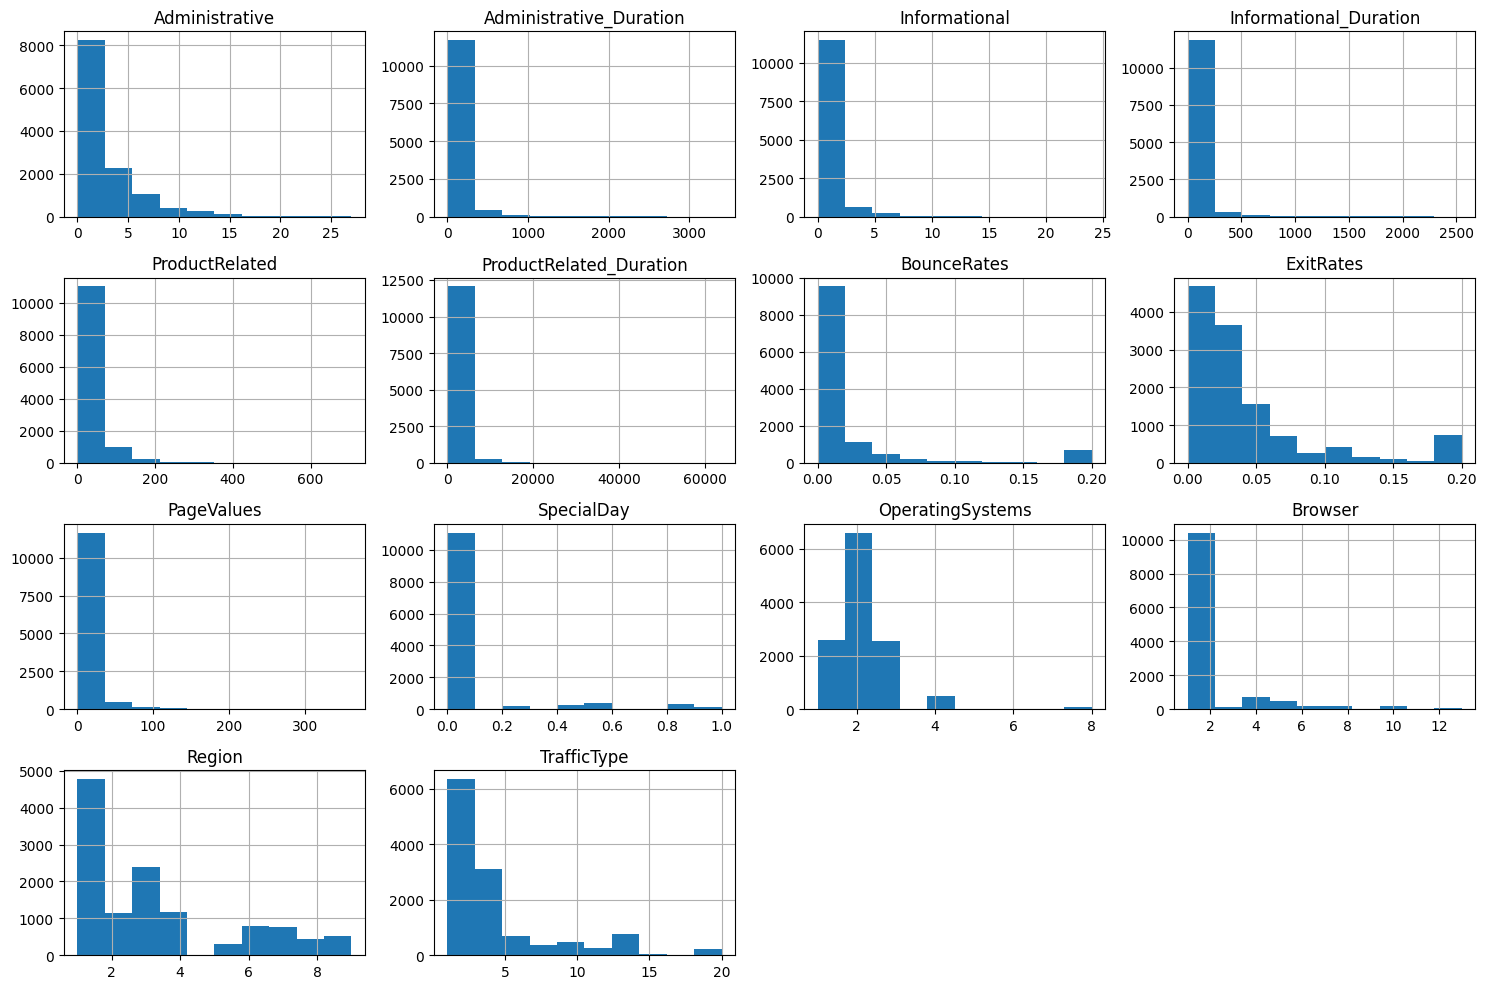

In [17]:
# Histogramas para características numéricas
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

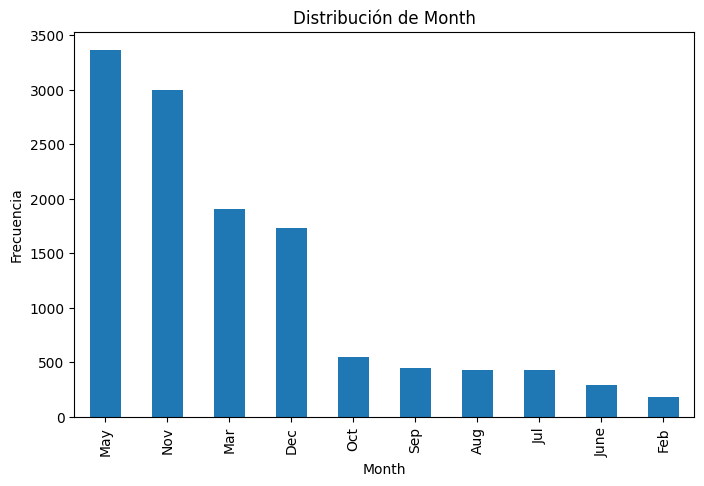

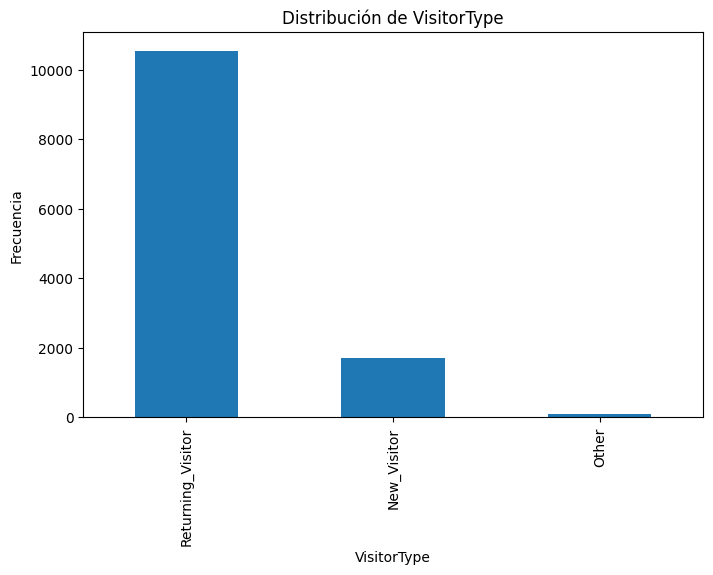

In [18]:
# Gráficos de barras para características categóricas
categorical_features = ['Month', 'VisitorType']
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    X[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

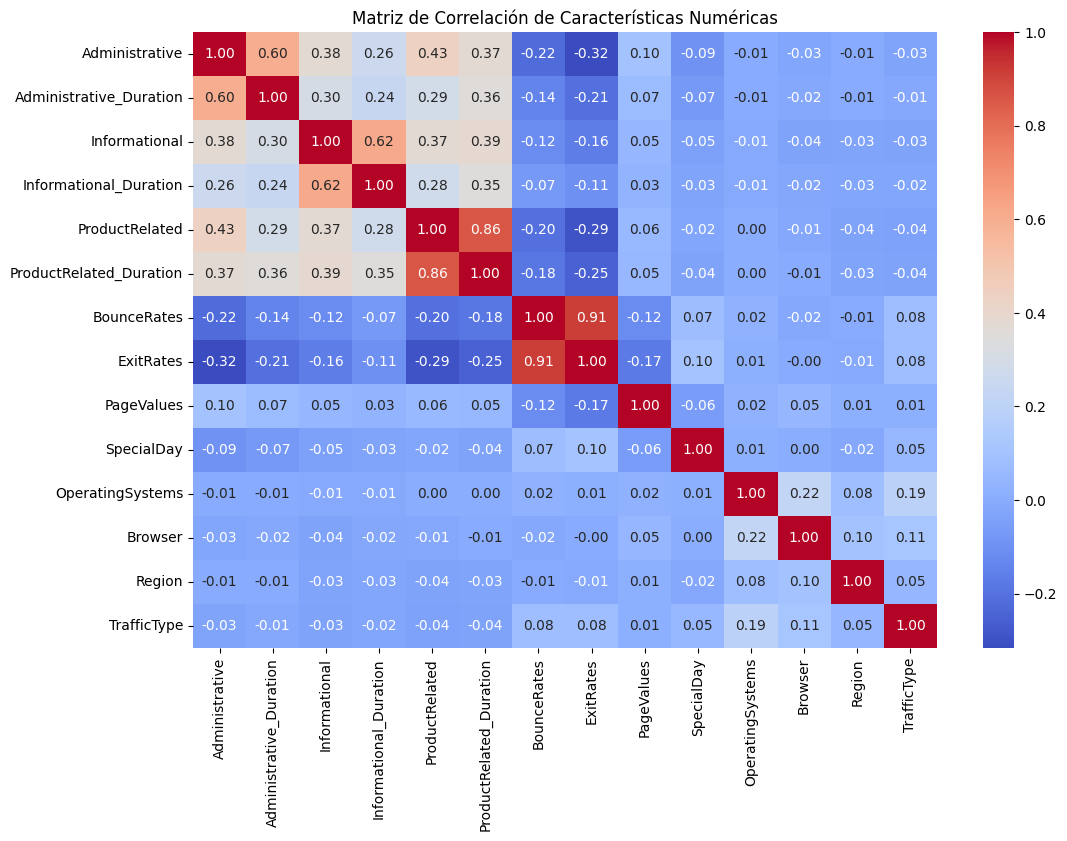

In [19]:
# Matriz de correlación para características numéricas
plt.figure(figsize=(12, 8))
correlation_matrix = X[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Características Numéricas')
plt.show()

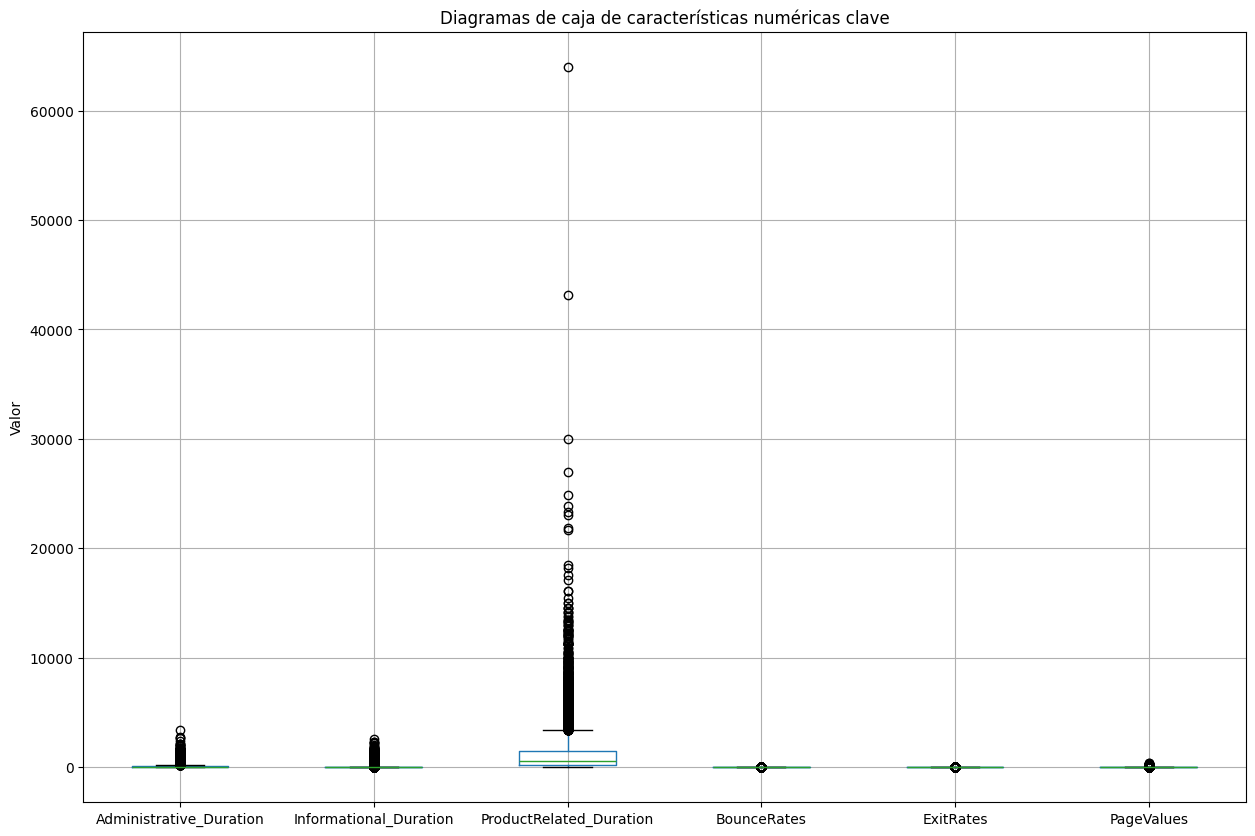

In [20]:
# Diagramas de caja de características numéricas clave
key_numerical_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
plt.figure(figsize=(15, 10))
X[key_numerical_features].boxplot()
plt.title('Diagramas de caja de características numéricas clave')
plt.ylabel('Valor')
plt.show()

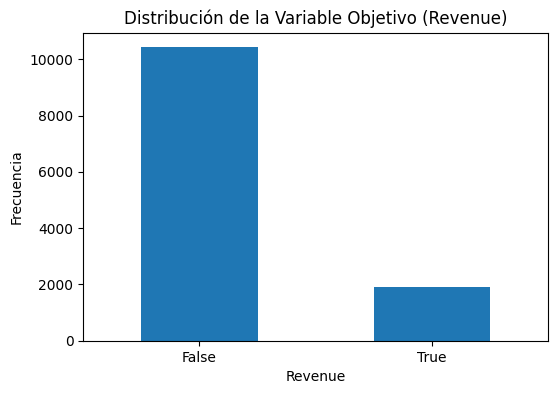

In [21]:
# Distribución de la Variable Objetivo (Revenue)
plt.figure(figsize=(6, 4))
y['Revenue'].value_counts().plot(kind='bar')
plt.title('Distribución de la Variable Objetivo (Revenue)')
plt.xlabel('Revenue')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.show()

In [22]:
# Analisis de la variable objetivo (Revenue)

# Conteo de valores
revenue_counts = y['Revenue'].value_counts()
print("Conteo de valores de la variable objetivo (Revenue):")
print(revenue_counts)

# Porcentaje de distribución de la variable objetivo (Revenue)
revenue_percentage = y['Revenue'].value_counts(normalize=True) * 100
print("\nPorcentaje de distribución de la variable objetivo (Revenue):")
print(revenue_percentage)


Conteo de valores de la variable objetivo (Revenue):
Revenue
False    10422
True      1908
Name: count, dtype: int64

Porcentaje de distribución de la variable objetivo (Revenue):
Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


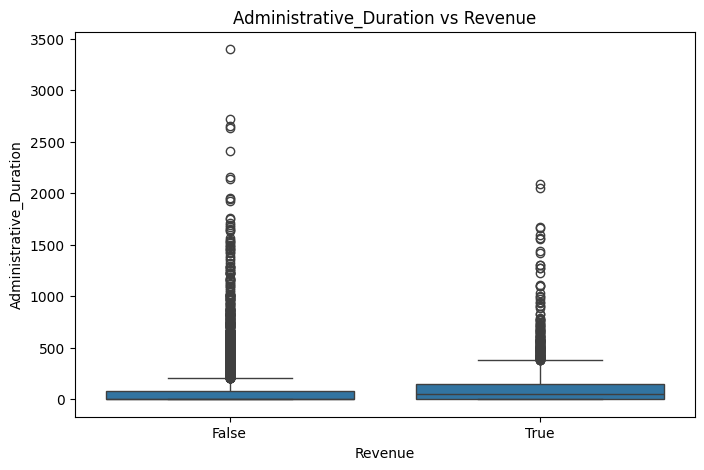

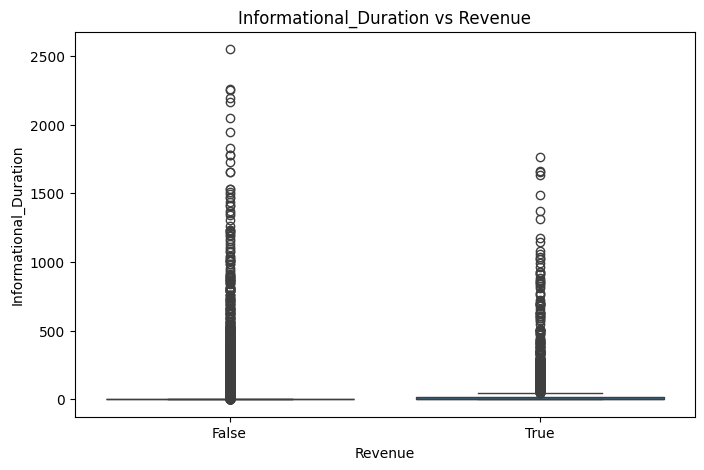

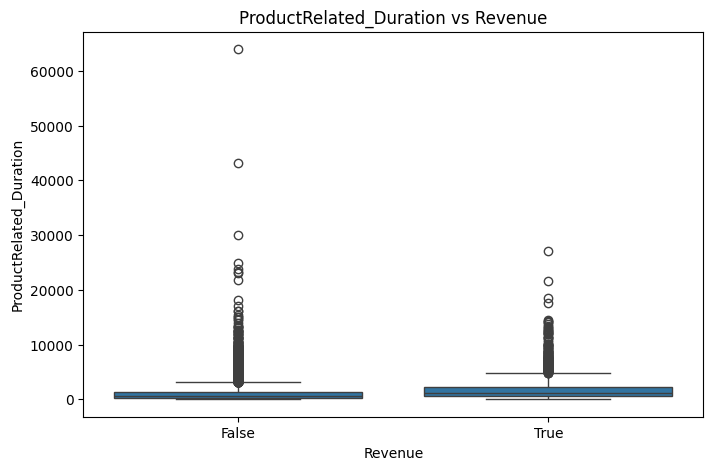

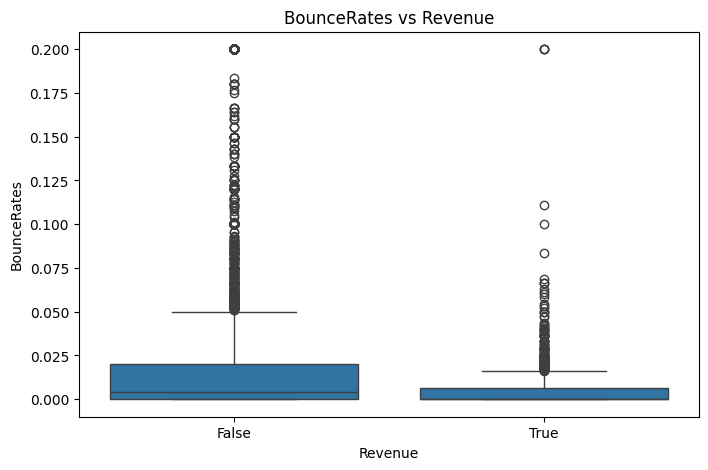

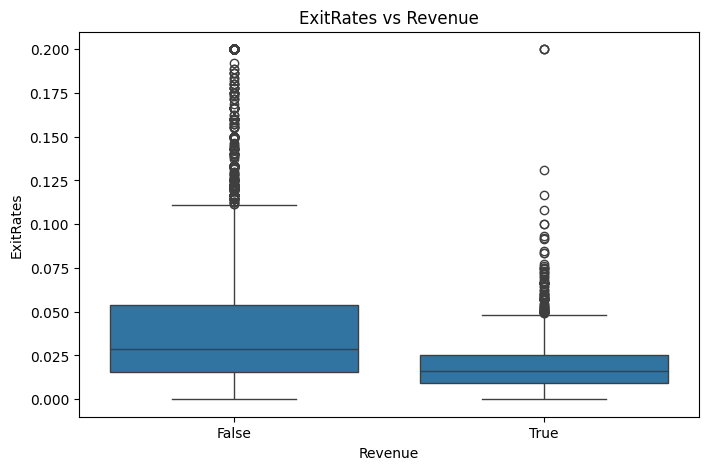

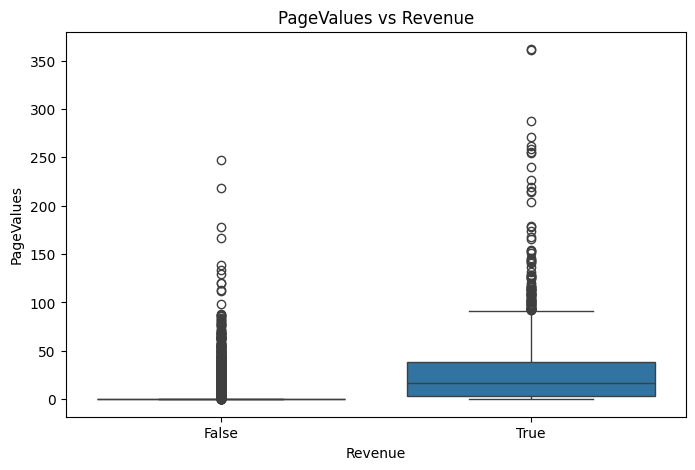

In [23]:
# Relación entre características numéricas clave y la variable objetivo
for col in key_numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=y['Revenue'], y=X[col])
    plt.title(f'{col} vs Revenue')
    plt.xlabel('Revenue')
    plt.ylabel(col)
    plt.xticks(ticks=[0, 1], labels=['False', 'True'])
    plt.show()

## Conclusiones

El análisis exploratorio del dataset de Online Shoppers Purchasing Intention nos revela un conjunto de datos bien estructurado con 12,330 muestras y 17 variables predictoras sin valores faltantes. Sin embargo, presenta un desbalance significativo en la variable objetivo, donde solo el 15% de las sesiones resultan en compras. Las variables numéricas muestran distribuciones sesgadas con valores atípicos importantes, especialmente en las variables de duración, mientras que la matriz de correlación sugiere posibles problemas de multicolinealidad entre variables relacionadas. El análisis indica que PageValues es un predictor crítico para la conversión, mientras que las altas tasas de rebote y salida señalan oportunidades de mejora en la experiencia del usuario.

Para el desarrollo de modelos predictivos de manera efectiva, es necesario tomar estrategias de balanceo de clases, como por ejemplo el sobre-muestreo (SMOTE), aplicar transformaciones o manejar los datos atípicos, realizar la respectiva codificación de las variables y hacer énfasis en la correcta selección de las características, para así lograr reducir significativamente el problema de multicolinealidad al tener varias variables independientes con una alta correlación, lo cual dificulta determinar el efecto único de cada variable sobre la variable dependiente.